# Purpose

Test out running images to GPT-4 image recognition model for querying them.

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from rich import print
import os

# Constants

In [2]:
# Make sure we have the version we expect
!pip show python-dotenv

Name: python-dotenv
Version: 1.0.0
Summary: Read key-value pairs from a .env file and set them as environment variables
Home-page: https://github.com/theskumar/python-dotenv
Author: Saurabh Kumar
Author-email: me+github@saurabh-kumar.com
License: BSD-3-Clause
Location: /Users/davemcrench/anaconda3/lib/python3.11/site-packages
Requires: 
Required-by: anaconda-cloud-auth


In [3]:
from dotenv import load_dotenv

load_dotenv(override=True)

True

# Check Available Models

In [4]:
from roadtrip.models.openai_tools import find_models

In [5]:
find_models('gpt-4')

['gpt-4-0613',
 'gpt-4',
 'gpt-4-1106-preview',
 'gpt-4-vision-preview',
 'gpt-4-0314']

`gpt-4-vision-preview` is the one we want!

# Query a Sample Image

Using the [OpenAI API quickstart](https://platform.openai.com/docs/guides/vision/quick-start) for the topic.

Note the [following restrictions](https://platform.openai.com/docs/guides/vision/faq) for GPT-4V as of 12/23/2023:

1. They currently support
    * PNG (.png)
    * JPEG (.jpeg and .jpg)
    * WEBP (.webp)
    * Non-animated GIF (.gif)
2. 20MG limit per image
3. Images are deleted on OpenAI's side automatically after being processed
4. The model will not process image metadata automatically
    * But I imagine that's something you can add as part of your prompt engineering.

## Our Image

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg)

In [26]:
from roadtrip.models.openai_tools import count_image_tokens

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"
count_image_tokens(url=url, high_resolution=True)

3485

## Quickstart

In [31]:
from roadtrip.models.openai_tools import ask_simple_vision_question

question = "What’s in this image?"
answer = ask_simple_vision_question(question, url)
answer

'The image features a wooden boardwalk leading through a lush green meadow or wetland area. The terrain on either side of the boardwalk is covered with tall green grasses and small shrubs or bushes in the distance. Above, there is a blue sky scattered with some white clouds, suggesting a sunny, fair-weather day. The setting looks serene and could be part of a nature reserve or park, offering a path for visitors to enjoy the natural surroundings without disturbing the local ecology.'

## Important Caveats

From OpenAI:

> The model is best at answering general questions about what is present in the images. While it does understand the relationship between objects in images, *it is not yet optimized to answer detailed questions about the **location** of certain objects in an image.* For example, you can ask it what color a car is or what some ideas for dinner might be based on what is in you fridge, but if you show it an image of a room and ask it where the chair is, it may not answer the question correctly.

Also note the [limitations of the GPT-4V model](https://platform.openai.com/docs/guides/vision/limitations). In particular, this seems relevant for cameras that are observing scenes and may try to capture more info by using wide-angle lenses:

> Image shape: The model struggles with panoramic and fisheye images.

# An EV-Specific Example

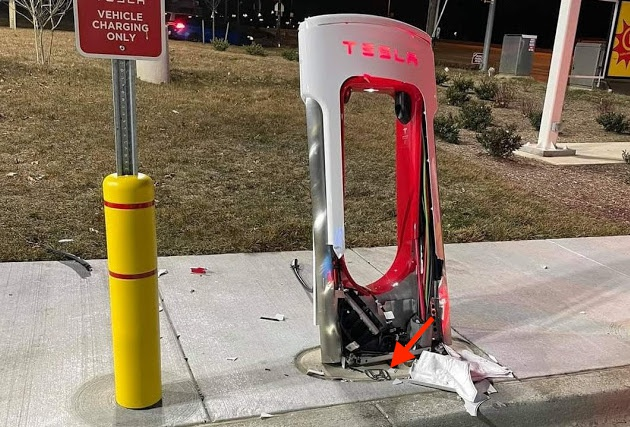

In [34]:
from roadtrip.models.openai_tools import url_to_image

url = "https://qph.cf2.quoracdn.net/main-qimg-80782e891a2b3a01e0e6b6da6fee846f"
url_to_image(url)

In [39]:
%%time

question = "Do you see any maintenance concerns in this image? If so, please provide an enumerated list of them as your output. Otherwise respond with 'No problems here!'"
answer = ask_simple_vision_question(question, img_url=url)
print(answer)

The image shows a damaged Tesla charging station. Here are the maintenance concerns visible in the image:

1. The charging station is physically damaged — the outer shell is ripped open, exposing internal components.
2. There is debris on the ground near the charging station that could pose a safety hazard.
3. The damage to the charging station may have compromised its electrical systems, posing a potential electrical 
hazard.
4. The charging cable and connector appear to be missing, indicating that this unit is currently non-functional and
requires repair or replacement.
5. The pole with the sign "VEHICLE CHARGING ONLY" is leaning slightly, which might suggest it was impacted as well 
or is not securely fixed.

Immediate attention is required to address these issues to ensure safety and restore the functionality of the 
charging station.

CPU times: user 26.4 ms, sys: 8.87 ms, total: 35.3 ms
Wall time: 11.7 s


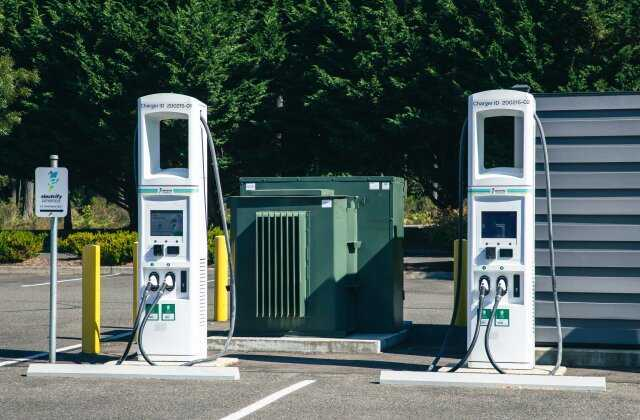

In [42]:
from IPython import display

path = '../data/imagery/marks_tricky_example_charger.jpg'
display.Image(path)

In [44]:
%%time

question = "Do you see any maintenance concerns in this image? If so, please provide an enumerated list of them as your output. Otherwise respond with 'No problems here!'"
answer = ask_simple_vision_question(question, img_filepath=path)
print(answer)

No problems here!

CPU times: user 31.3 ms, sys: 3.19 ms, total: 34.5 ms
Wall time: 2.78 s
